<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My research aimed to find the correlations between education and homelessness in counties within new jersey and in the process i stumbled on elevated rates of homelessness in counties  with a high density of universities and colleges in New Jersey. This prompts an inquiry into the underlying factors contributing to this phenomenon. One potential explanation is that areas with numerous educational institutions attract a diverse population, including students and low-income individuals, which may strain local housing resources and exacerbate affordability issues. Additionally, these regions often experience rising rental prices driven by demand for student housing, pushing vulnerable populations further into precarious living situations. Furthermore, the presence of educational institutions may indicate a concentration of social services and support systems, potentially attracting individuals facing homelessness in search of resources. This interplay between educational access and housing stability invites further exploration into the systemic issues that lead to both educational opportunities and homelessness within these urban environments. Understanding this relationship can inform policy interventions aimed at addressing the housing crisis while enhancing educational accessibility.

In [3]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [4]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

### [sep5] map your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

maps have their own files, a popular one is 'shapefile'--have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names

In [22]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


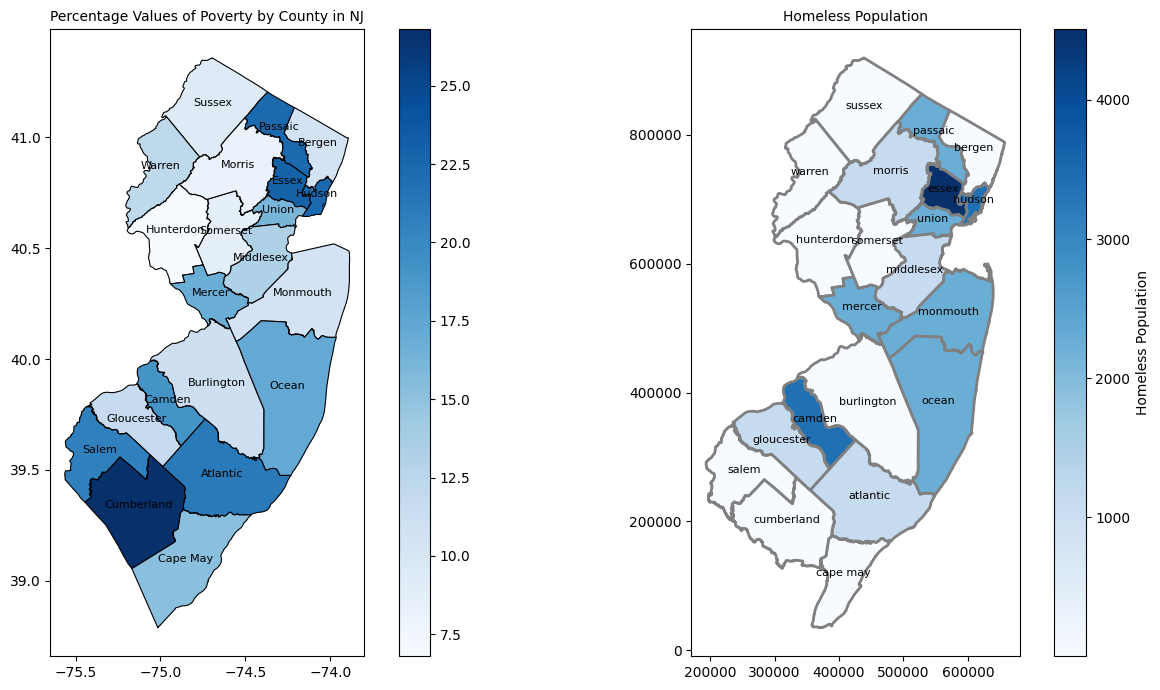

In [24]:
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Code 1: Data for percentage values by county
data = {
    'County': ['Cumberland County', 'Essex County', 'Hudson County', 'Passaic County', 'Atlantic County',
               'Salem County', 'Camden County', 'Ocean County', 'Mercer County', 'Union County',
               'Cape May County', 'Middlesex County', 'Warren County', 'Gloucester County',
               'Burlington County', 'Bergen County', 'Monmouth County', 'Sussex County',
               'Somerset County', 'Morris County', 'Hunterdon County'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Load the shapefile of New Jersey counties
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Standardize and merge data
df['County'] = df['County'].str.replace("County", "").str.strip()
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip()
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Code 2: Download and unzip
!wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
with zipfile.ZipFile('nj-counties.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load shapefile for second map and prepare data
njC0 = gpd.read_file('nj_counties.shp')
njC0['COUNTY'] = njC0['COUNTY'].str.strip().str.lower()
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.strip().str.lower()  # Assuming Chronicity data is already loaded
njMerged = njC0.merge(Chronicity, on='COUNTY', how='left')

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Code 1
nj_counties.plot(ax=axes[0], column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
axes[0].set_title('Percentage Values of Poverty by County in NJ', fontsize=10)
for idx, row in nj_counties.iterrows():
    centroid = row['geometry'].centroid
    axes[0].text(centroid.x, centroid.y, row['NAME'], fontsize=8, ha='center', color='black')

# Plot Code 2
njMerged.plot(ax=axes[1], column='population', cmap='Blues', scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2)
axes[1].set_title("Homeless Population", fontsize=10)
for idx, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    axes[1].text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Color bar for Code 2
norm = mpl.colors.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max())
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='Blues'), ax=axes[1])
cbar.set_label('Homeless Population', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show();


Honing in on Camden to understand the homelessness statistics and the relationship with schools

In [60]:
import zipfile
import geopandas as gpd

# Step 1: Download the municipality shapefile zip file using wget
!wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

# Step 2: Extract the zip file contents
with zipfile.ZipFile('Municipality.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Uncomment this line to extract the files

# Step 3: Load the municipality shapefile into a GeoDataFrame using geopandas
njMun = gpd.read_file('Municipalities.shp')


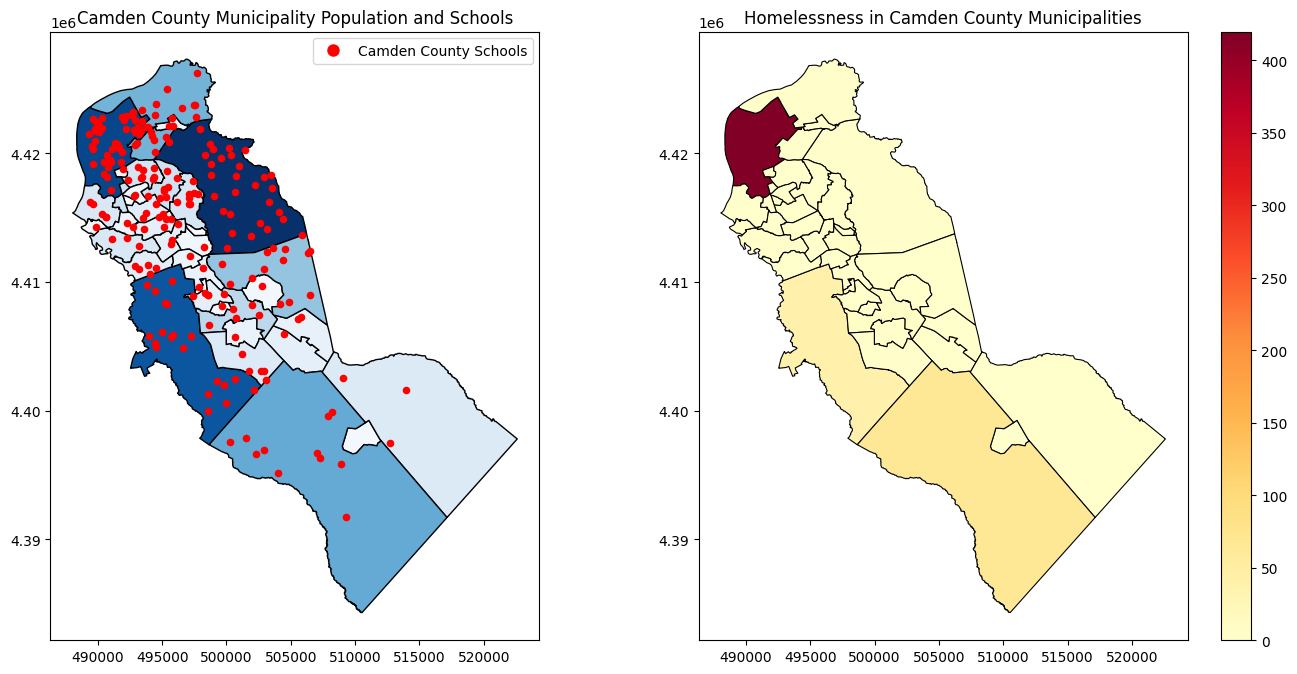

In [76]:
import zipfile
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Download and unzip the municipality shapefile
!wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

# Extract the zip file contents
with zipfile.ZipFile('Municipality.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the municipality shapefile using geopandas
njMun = gpd.read_file('Municipalities.shp')

# Clean and rename the 'NAMELSAD' column to 'Municipality'
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

# Load the population data
MunPop = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')

# Clean municipality names by stripping and converting to lowercase
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the shapefile data with the population data
njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

# Load the schools shapefile
cmdsch = gpd.read_file('Schools.shp')

# Ensure both GeoDataFrames use the same CRS
cmdsch = cmdsch.to_crs(njMun1.crs)

# Load the homelessness data
MunHom = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20homelessness.xlsx')

# Clean municipality names for merging
MunHom['Municipality'] = MunHom['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the municipality shapefile with homelessness data
njMun2 = njMun.merge(MunHom, on='Municipality', how='left')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first map: Camden County Municipality Population and Schools
njMun1.plot(ax=ax1, column='population', cmap='Blues', edgecolor='black', linewidth=1)
cmdsch.plot(ax=ax1, marker='o', color='red', markersize=20)

# Custom legend for schools
legend_handle = Line2D([0], [0], label='Camden County Schools', marker='o', color='w',
                       markerfacecolor='red', markersize=10)
ax1.legend(handles=[legend_handle], loc='upper right')
ax1.set_title('Camden County Municipality Population and Schools')

# Plot the second map: Homelessness in Camden County Municipalities
njMun2.plot(ax=ax2, column='Homelessness', cmap='YlOrRd', edgecolor='black', linewidth=0.8, legend=True)
ax2.set_title('Homelessness in Camden County Municipalities')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots side by side
plt.show();


In [7]:
Chronicity=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/chronic.xlsx')
Chronicity.dtypes
Chronicity.head(3)

,0
County,object
population,int64


,County,population
0,Atlantic,214
1,Bergen,51
2,Burlington,3


In [10]:
# Rename the 'County' column to 'COUNTY' in the Chronicity DataFrame
Chronicity.rename(columns={'County': 'COUNTY'}, inplace=True)

# Convert the contents of the 'COUNTY' column to uppercase
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.upper()

# Check the updated DataFrame
print(Chronicity.head())

         COUNTY  population
0    ATLANTIC           214
1      BERGEN            51
2  BURLINGTON             3
3       CAMDEN         1888
4      CAPE MAY           4


In [14]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [15]:
njC0.dtypes
njC0.head(3)

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,int64


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."


In [16]:
njC0['COUNTY'] = njC0['COUNTY'].str.strip().str.lower()
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.strip().str.lower()

In [17]:


# Merge njC0 with Chronicity on 'COUNTY'
njMerged = njC0.merge(Chronicity, on='COUNTY', how='left')


<Axes: >

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'atlantic')

Text(608674.9722903798, 775344.9010704905, 'bergen')

Text(445015.10017129, 380378.9908087645, 'burlington')

Text(362977.140254135, 353705.812773536, 'camden')

Text(407013.1101691078, 114992.23820242906, 'cape may')

Text(319542.7506195572, 197359.46040186452, 'cumberland')

Text(562253.4894992855, 711675.2449585614, 'essex')

Text(311851.0044582621, 322497.09146205307, 'gloucester')

Text(608428.8356149012, 694107.9908801537, 'hudson')

Text(377593.6983420124, 631791.0280015195, 'hunterdon')

Text(435852.78759398806, 528228.3056099586, 'mercer')

Text(569736.7056196635, 519774.2489392377, 'monmouth')

Text(553566.9451515801, 382793.6503082437, 'ocean')

Text(547142.4144700206, 801720.2266180195, 'passaic')

Text(253014.767951469, 275761.56707926694, 'salem')

Text(459788.98517990607, 630164.5125108969, 'somerset')

Text(439541.23874521523, 839964.6338105244, 'sussex')

Text(545391.2858900087, 665430.0582508749, 'union')

Text(354515.98946147866, 737506.369618912, 'warren')

Text(479789.7234039994, 738913.4075906109, 'morris')

Text(516625.77448488685, 584830.6357102671, 'middlesex')

[]

[]

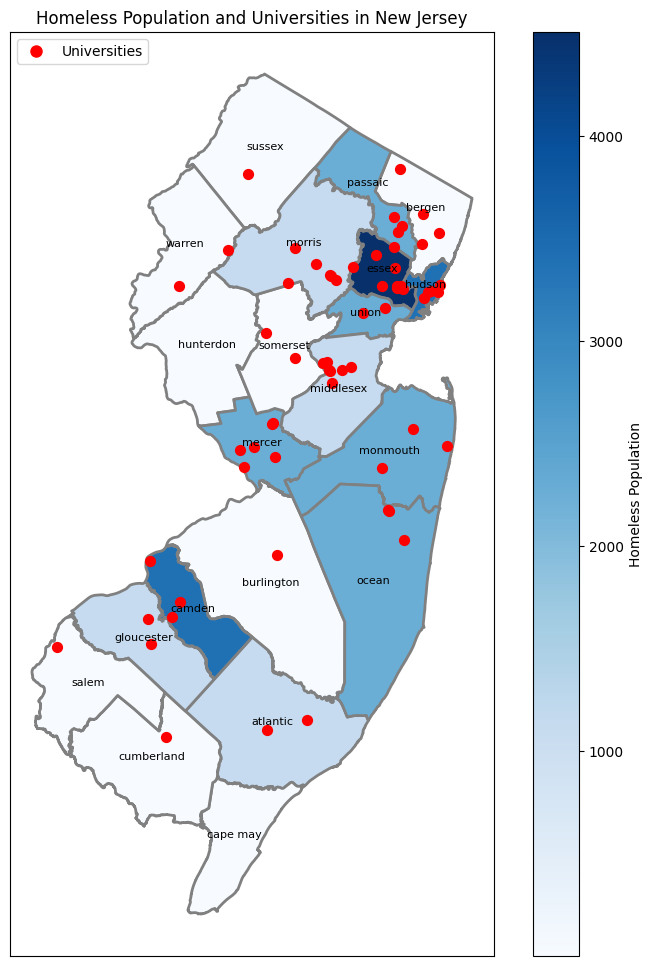

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

# Plot homeless population and overlay universities
fig, ax = plt.subplots(1, figsize=(10, 12))

# Plot njMerged for homeless population, using a blue color scale
njMerged.plot(ax=ax, column='population', legend=False, cmap='Blues', scheme='natural_breaks', k=5,
              edgecolor='grey', linewidth=2)

# Overlay universities from the 'col' shapefile with red markers
col.plot(ax=ax, marker='o', color='red', markersize=50, legend=True, label='Universities')

# Label each county with its name in black
for idx, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Set the title for the map
ax.title.set_text("Homeless Population and Universities in New Jersey")

# Remove x and y axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Add a legend for the university markers manually
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Universities',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left')

# Create a colorbar for the homeless population data
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max()))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Homeless Population')

# Show the map
plt.show()


<Axes: >

Text(0.5, 1.0, 'Camden County Municipalities')

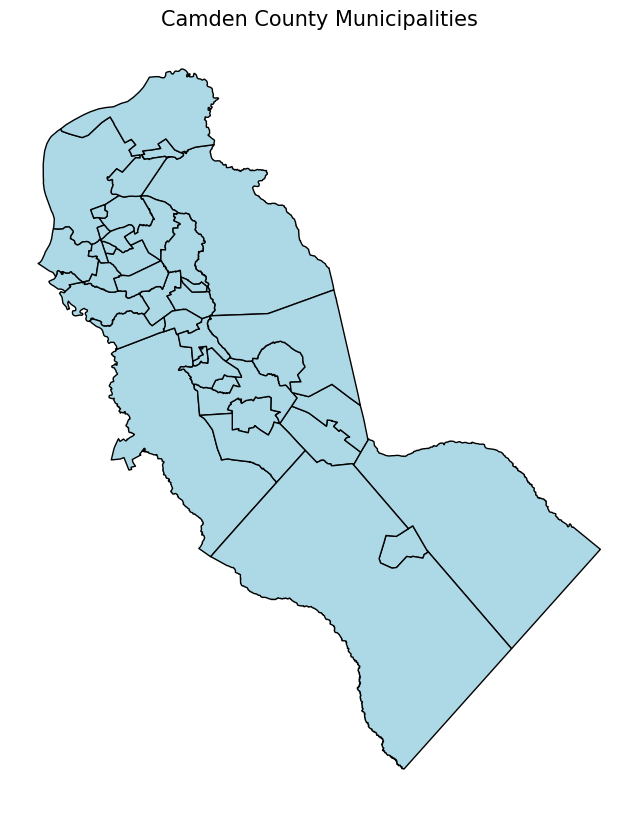

In [ ]:
! wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

zip_ref = zipfile.ZipFile('Municipality.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njMun=gpd.read_file('Municipalities.shp')

# Step 4: Plot the shapefile with black edges
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Create a figure and axis

# Plot with specified color and edgecolor
njMun.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and remove axis for a cleaner look
ax.set_title('Camden County Municipalities', fontsize=15)
ax.set_axis_off()


# Show the plot
plt.show()

In [ ]:
col = gpd.read_file('Municipality.zip')
col.dtypes



,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:

njMun.dtypes #with geopandas can do stuff like with pandas :)
#njMun.info()

,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

In [ ]:
MunPop=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
#njMun1 = pd.merge(njMun, MunPop, on='Municipality',how='outer',indicator=True)
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

<Axes: >

[]

[]

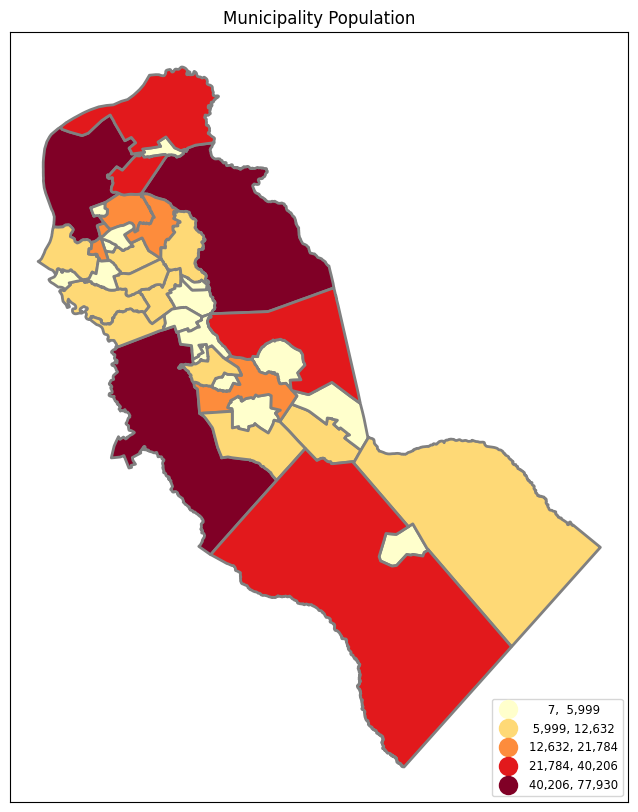

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun1.plot(ax=ax,column='population',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Municipality Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
MunSch=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')